# OLA 2023
## Project overview
### The advertising environment

In [20]:
from Environment import Environment
import numpy as np
import matplotlib.pyplot as plt

adv_env = Environment()

Let's set the environment

In [21]:
n_obs = 100 #number of observations to run

noise_std = 5.0 #noise standard deviation

bids = np.linspace(0.0, 3, 20) #the bids go from 0 to 3 with 20 equal-length steps

T = 365  #time-span

# Initialize two empty arrays to store observed bids and clicks
x_obs = np.array([]) #observed bids
y_obs = np.array([]) #observed clicks

# We define the total cost for each bid, starting from 0
total_cost = np.zeros(len(bids))
clicks_per_bid = [] #number of clicks of each bid

We can now generate some observations. The time-span is 365 days ($T=365$) and, for each day, we have to observe $n\_obs$ experiments.

Observations are generated by randomly selecting bids and adding noise to the expected number of clicks 

Let's start by plotting the curves

In [22]:
x_pred = np.atleast_2d(bids).T #transformation is done in order to plot it easily
x_pred

array([[0.        ],
       [0.15789474],
       [0.31578947],
       [0.47368421],
       [0.63157895],
       [0.78947368],
       [0.94736842],
       [1.10526316],
       [1.26315789],
       [1.42105263],
       [1.57894737],
       [1.73684211],
       [1.89473684],
       [2.05263158],
       [2.21052632],
       [2.36842105],
       [2.52631579],
       [2.68421053],
       [2.84210526],
       [3.        ]])

### The bid/cost curve

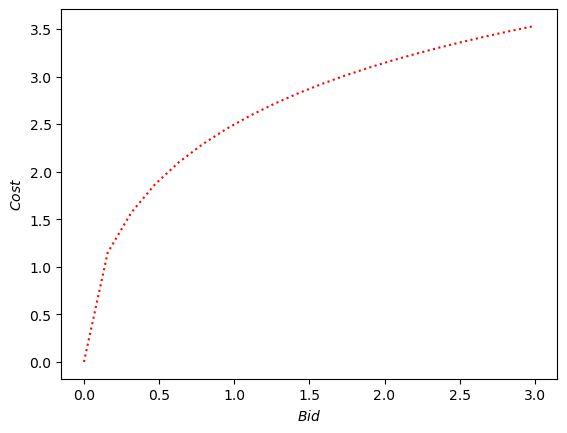

In [23]:
plt.plot(x_pred, (np.log(x_pred+1)**0.5)*3, 'r:', label=r'$Bid/Cost$')
plt.xlabel('$Bid$')
plt.ylabel('$Cost$')
plt.show()

### The bid/click curve

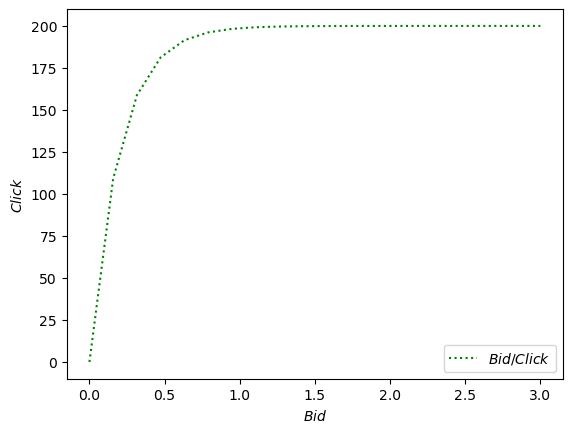

In [24]:
plt.plot(x_pred, (1.0 - np.exp(-5.0 * x_pred)) * 200, 'g:', label=r'$Bid/Click$')
plt.xlabel('$Bid$')
plt.ylabel('$Click$')
plt.legend(loc = 'lower right')
plt.show()

Let's now execute one iteration to see what happens

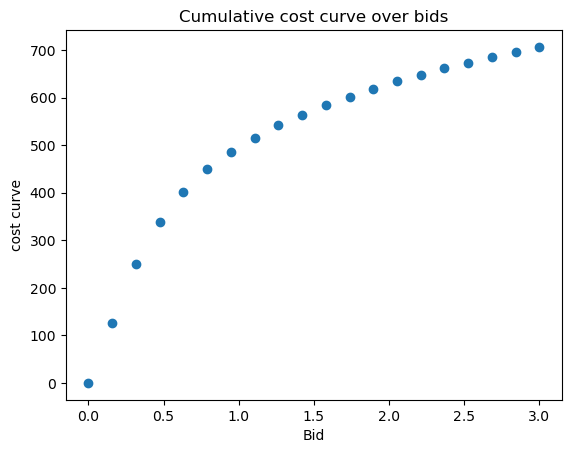

In [25]:
cost_curve = adv_env.classes[0].get_total_cost(x_pred)

# Create a scatter plot of the points
plt.scatter(x_pred, cost_curve)
plt.xlabel('Bid')
plt.ylabel('cost curve')
plt.title('Cumulative cost curve over bids')
plt.show()

We can now execute the whole experiment $n\_obs\times T$ times

In [26]:
for t in range(0, T):
    for i in range(0, n_obs):
        new_x_obs = np.random.choice(bids, 1) #get one random bid from the bids array
        x_obs = np.append(x_obs, new_x_obs) #append the newly observed bid to observed bids list (x_obs)
        
        #Computation is done for class 0, get total cost by multiplying the two functions
        cost_curve = adv_env.classes[0].get_total_cost(x_pred)  
    total_cost += cost_curve.ravel()

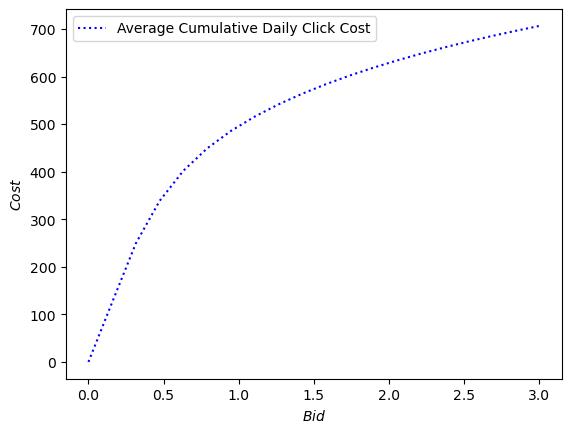

In [27]:
# Total cumulative day average by dividing by 365
plt.plot(x_pred, total_cost/T, 'b:', label='Average Cumulative Daily Click Cost')
plt.xlabel('$Bid$')
plt.ylabel('$Cost$')
plt.legend(loc='upper left')
plt.show()

# Step 1: learning for pricing
Consider the case in which all the users belong to class C1.

Assume that the curves related to the advertising part of the problem are known, while the curve related to the pricing problem is not.

Apply the UCB1 and TS algorithms, reporting the plots of the average (over a sufficiently large number of runs) value and standard deviation of
- cumulative regret,
- cumulative reward,
- instantaneous regret,
- instantaneous reward

In [31]:
from Pricing_Environment import Environment_Pricing
from scipy.interpolate import interp1d

In [30]:
env_pr = Environment_Pricing()
prices = env_pr.prices # list of prices
classes = env_pr.classes # list of categories

Showing the conversion rates for each class

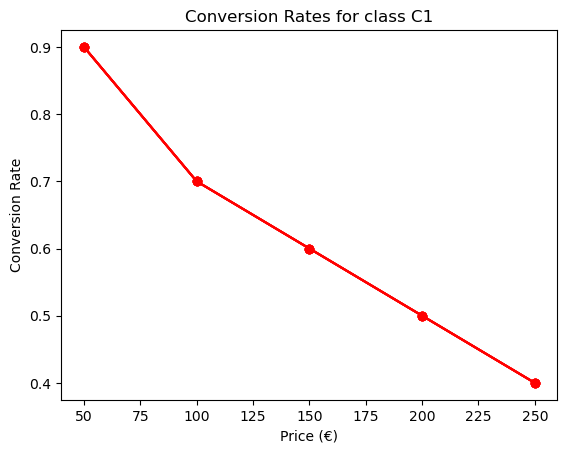

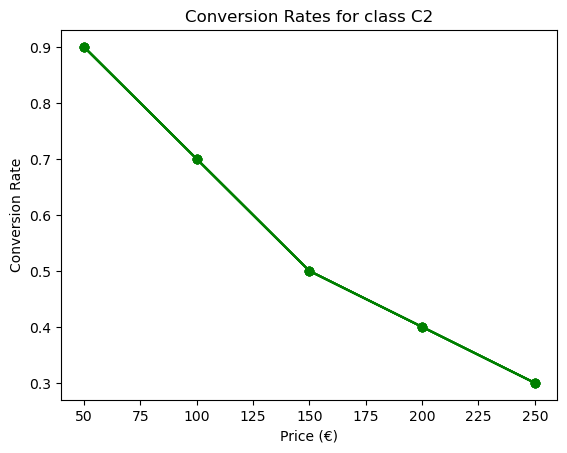

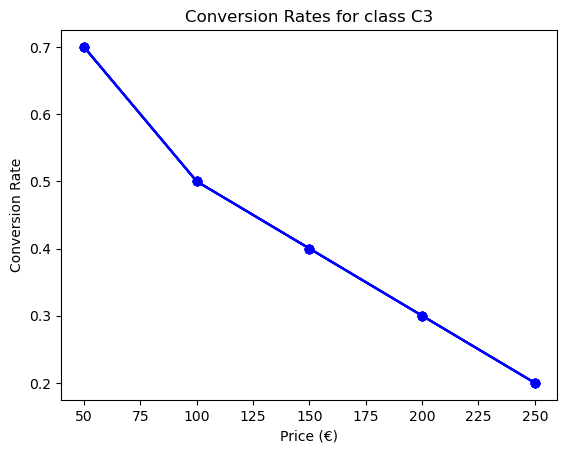

In [38]:
colors = ['r', 'g', 'b']

for i in range(len(classes)):
    for j in range(len(env_pr.prices)):
        y = classes[i].get_conversion_probabilities()
        smooth = interp1d(prices, y, kind='cubic')
        plt.plot(prices, smooth(prices), color=colors[i])
        plt.scatter(prices, y, color=colors[i])
        plt.title("Conversion Rates for class " + classes[i].name)
        plt.xlabel("Price (€)")
        plt.ylabel("Conversion Rate")

    plt.show()        